In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import time
import os,jpype
import json_lines
from tqdm import tqdm

# Test Dataset Analytic

In [7]:
DataPath="../FinalDataSet/"

In [8]:
val_df=pd.read_csv(DataPath+"java_code_testset.csv")
print(len(val_df))

20615


In [9]:
val_df.head()

Unnamed: 0                                           Original  \
0           0  protected final void fastPathOrderedEmit(U val...   
1           1  @SuppressWarnings("unchecked")\n    @CheckRetu...   
2           2  @SuppressWarnings({ "unchecked", "rawtypes" })...   
3           3  @SuppressWarnings({ "unchecked" })\n    @Check...   
4           4  @CheckReturnValue\n    @SchedulerSupport(Sched...   

                                              Parsed  \
0  protected final void fastPathOrderedEmit(U val...   
1  @SuppressWarnings("unchecked") @CheckReturnVal...   
2  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
3  @SuppressWarnings({"unchecked"}) @CheckReturnV...   
4  @CheckReturnValue @SchedulerSupport(SchedulerS...   

                                               Fixed  \
0  protected final void fastPathOrderedEmit(U val...   
1  @SuppressWarnings("unchecked") @CheckReturnVal...   
2  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
3  @SuppressWarnings({"unchecked"}) @CheckReturnV...   
4  @CheckReturnValue @SchedulerSupport(SchedulerS...   

                                               Train  \
0  protected final void fastPathOrderedEmit(U val...   
1  @SuppressWarnings("unchecked") @CheckReturnVal...   
2  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
3  @SuppressWarnings({"unchecked"}) @CheckReturnV...   
4  @CheckReturnValue @SchedulerSupport(SchedulerS...   

                                           Train-OPT  Complexity  LineNumber  \
0  protected final void fastPathOrderedEmit(U val...           6          22   
1  @SuppressWarnings("unchecked") @CheckReturnVal...           3          11   
2  @SuppressWarnings({"unchecked","rawtypes"}) @C...           3           9   
3  @SuppressWarnings({"unchecked"}) @CheckReturnV...           3           9   
4  @CheckReturnValue @SchedulerSupport(SchedulerS...           3          10   

   Methodlength    LLratio  StringPercentage  \
0           565  25.681818          0.000000   
1           468  42.545455          0.051282   
2           483  53.666667          0.035197   
3           390  43.333333          0.023077   
4           382  38.200000          0.034031   

                                               Input  \
0  protected final void fastPathOrderedEmit(U val...   
1  @SuppressWarnings("unchecked") @CheckReturnVal...   
2  @SuppressWarnings({"unchecked","rawtypes"}) @C...   
3  @SuppressWarnings({"unchecked"}) @CheckReturnV...   
4  @CheckReturnValue @SchedulerSupport(SchedulerS...   

                                 Output  
0             accept(observer,value);\n  
1                     if (len == 1) {\n  
2                     return empty();\n  
3   else   if (sources.length == 1) {\n  
4            if (items.length == 0) {\n

In [10]:
outputs=list(val_df["Output"])

In [11]:
outputs_length=[len(x) for x in outputs]

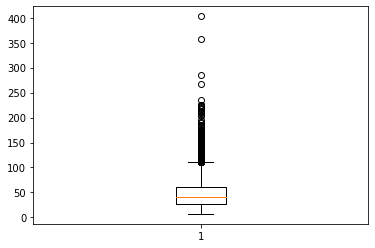

In [12]:
plt.boxplot(outputs_length)
plt.show()

In [13]:
outputs_length=sorted(outputs_length)

In [14]:
min(outputs_length)

7

In [15]:
max(outputs_length)

403

In [16]:
np.median(outputs_length)

41.0

In [17]:
sum(outputs_length) / float(len(outputs_length))

45.93475624545234

# GPT2 large num_beam 1

In [18]:
result_v12=pd.read_csv("GPT_large_valid_num_beam_1_20615.csv")  

In [19]:
len(result_v12)

20615

In [20]:
result_v12.describe()

Unnamed: 0    Index         Token          Line     precision  \
count  20615.000000  20615.0  20615.000000  20615.000000  20615.000000   
mean   10307.000000      0.0      0.513743      0.510552      0.422098   
std     5951.182235      0.0      0.439019      0.290555      0.363786   
min        0.000000      0.0      0.000000      0.000000      0.000000   
25%     5153.500000      0.0      0.000000      0.289500      0.000000   
50%    10307.000000      0.0      0.363600      0.438100      0.333300   
75%    15460.500000      0.0      1.000000      0.732550      0.714300   
max    20614.000000      0.0      1.000000      1.000000      1.000000   

             recall  
count  20615.000000  
mean       0.389693  
std        0.356618  
min        0.000000  
25%        0.000000  
50%        0.285700  
75%        0.666700  
max        1.000000

In [21]:
data=list(result_v12["Line"])

In [22]:
acc_6=[round(result_v12.describe()["Line"]["mean"],4),
      round(result_v12.describe()["precision"]["mean"],4),
      round(result_v12.describe()["recall"]["mean"],4)
      ]
acc_6

[0.5106, 0.4221, 0.3897]

# GPT2 large num_beam 3

In [23]:
result_v13=pd.read_csv("GPT_large_valid_num_beam_3_20615.csv")  

In [24]:
result_v13.describe()

Unnamed: 0    Index         Token          Line     precision  \
count  20615.000000  20615.0  20615.000000  20615.000000  20615.000000   
mean   10307.000000      2.0      0.605719      0.620949      0.524963   
std     5951.182235      0.0      0.433018      0.271464      0.364147   
min        0.000000      2.0      0.000000      0.000000      0.000000   
25%     5153.500000      2.0      0.181800      0.383650      0.200000   
50%    10307.000000      2.0      1.000000      0.575800      0.500000   
75%    15460.500000      2.0      1.000000      0.915850      1.000000   
max    20614.000000      2.0      1.000000      1.000000      1.000000   

             recall  
count  20615.000000  
mean       0.492442  
std        0.362244  
min        0.000000  
25%        0.200000  
50%        0.428600  
75%        0.857100  
max        1.000000

In [25]:
acc_7=[round(result_v13.describe()["Line"]["mean"],4),
      round(result_v13.describe()["precision"]["mean"],4),
      round(result_v13.describe()["recall"]["mean"],4)
      ]
acc_7

[0.6209, 0.525, 0.4924]

# GPT2 large num_beam 5

In [26]:
result_v14=pd.read_csv("GPT_large_valid_num_beam_5_20615.csv")  

In [27]:
result_v14.describe()

Unnamed: 0    Index         Token          Line     precision  \
count  20615.000000  20615.0  20615.000000  20615.000000  20615.000000   
mean   10307.000000      4.0      0.649255      0.661128      0.565288   
std     5951.182235      0.0      0.424030      0.262881      0.358871   
min        0.000000      4.0      0.000000      0.000000      0.000000   
25%     5153.500000      4.0      0.222200      0.429600      0.250000   
50%    10307.000000      4.0      1.000000      0.638300      0.600000   
75%    15460.500000      4.0      1.000000      0.973700      1.000000   
max    20614.000000      4.0      1.000000      1.000000      1.000000   

             recall  
count  20615.000000  
mean       0.533194  
std        0.359688  
min        0.000000  
25%        0.222200  
50%        0.500000  
75%        1.000000  
max        1.000000

In [28]:
acc_8=[round(result_v14.describe()["Line"]["mean"],4),
      round(result_v14.describe()["precision"]["mean"],4),
      round(result_v14.describe()["recall"]["mean"],4)
      ]
acc_8

[0.6611, 0.5653, 0.5332]

# GPT2 large num_beam 10

In [29]:
result_v15=pd.read_csv("GPT_large_valid_num_beam_10_20615.csv")  

In [30]:
result_v15.describe()

Unnamed: 0    Index         Token          Line     precision  \
count  20615.000000  20615.0  20615.000000  20615.000000  20615.000000   
mean   10307.000000      9.0      0.697393      0.704514      0.610211   
std     5951.182235      0.0      0.409166      0.250857      0.351054   
min        0.000000      9.0      0.000000      0.000000      0.000000   
25%     5153.500000      9.0      0.250000      0.483400      0.333300   
50%    10307.000000      9.0      1.000000      0.708700      0.666700   
75%    15460.500000      9.0      1.000000      1.000000      1.000000   
max    20614.000000      9.0      1.000000      1.000000      1.000000   

             recall  
count  20615.000000  
mean       0.577354  
std        0.353672  
min        0.000000  
25%        0.250000  
50%        0.571400  
75%        1.000000  
max        1.000000

In [31]:
em=len(result_v15[result_v15["Line"]==1])
si=len(result_v15[  (result_v15["Line"]>=0.5) & (result_v15["Line"]<1)])
ot=len(result_v15)-em-si

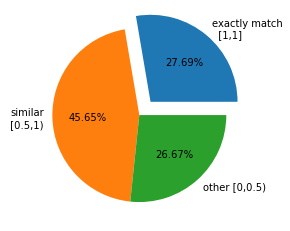

In [32]:
y = np.array([em,si,ot])
plt.pie(y,labels=['exactly match\n  [1,1]','similar\n [0.5,1)','other [0,0.5)'],explode=(0.2,0,0), autopct='%.2f%%',)
plt.show()

In [33]:
acc_9=[round(result_v15.describe()["Line"]["mean"],4),
      round(result_v15.describe()["precision"]["mean"],4),
      round(result_v15.describe()["recall"]["mean"],4)
      ]
acc_9

[0.7045, 0.6102, 0.5774]

# Conclusion 

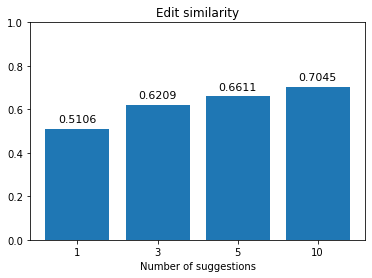

In [34]:
data = [acc_6[0],acc_7[0],acc_8[0],acc_9[0]]
labels = ["1","3","5","10"]
for a,b in zip([0,1,2,3] ,data): 
    plt.text(a, b+0.02, data[a], ha='center', va= 'bottom',fontsize=11) 
plt.bar(range(len(data)), data,tick_label=labels)
plt.ylim((0,1))
plt.xlabel("Number of suggestions")
plt.title('Edit similarity')
plt.show()

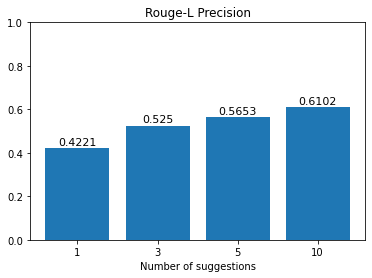

In [35]:
data = [acc_6[1],acc_7[1],acc_8[1],acc_9[1]]
labels = ["1","3","5","10"]
for a,b in zip([0,1,2,3] ,data): 
    plt.text(a, b+0.005, data[a], ha='center', va= 'bottom',fontsize=11) 
plt.bar(range(len(data)), data,tick_label=labels)
plt.ylim((0,1))
plt.xlabel("Number of suggestions")
plt.title('Rouge-L Precision')
plt.show()

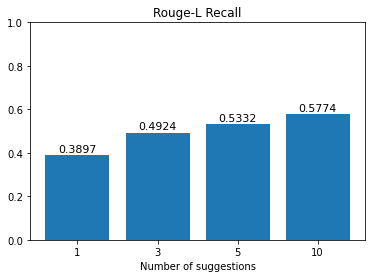

In [36]:
data = [acc_6[2],acc_7[2],acc_8[2],acc_9[2]]
labels = ["1","3","5","10"]
for a,b in zip([0,1,2,3] ,data): 
    plt.text(a, b+0.005, data[a], ha='center', va= 'bottom',fontsize=11) 
plt.bar(range(len(data)), data,tick_label=labels)
plt.ylim((0,1))
plt.xlabel("Number of suggestions")
plt.title('Rouge-L Recall')
plt.show()